# Top 50 ggplot2 Visualizations in Python - Part 1
> Same graphic using different libraries!

- toc: true 
- badges: true
- comments: true
- author: Nipun Batra
- categories: [visualisation]

A while back, I read this wonderful article called "[Top 50 ggplot2 Visualizations - The Master List (With Full R Code)](http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html)". Many of the plots looked very useful. In this post, I'll look at creating the first of the plot in Python (with the [help of Stack Overflow](https://stackoverflow.com/questions/44802561/python-plot-scatter-plot-with-category-and-markersize)).

Here's how the end result should look like.

### How the final plot should look like

![](http://r-statistics.co/screenshots/ggplot_masterlist_1.png)

### Attributes of above plot

1. X-Y scatter for area vs population
2. Color by state
3. Marker-size by population

I'll first use Pandas to create the plot. Pandas plotting capabilites are almost the first thing I use to create plots. Next, I'll show how to use [Seaborn](https://seaborn.pydata.org/) to reduce some complexity. Lastly, I'll use [Altair](https://altair-viz.github.io/index.html), [ggplot](http://ggplot.yhathq.com/) and [Plotnine](https://plotnine.readthedocs.io/en/stable/index.html) to show how it focuses on getting directly to the point, i.e. expressing the 3 required attributes!

### TLDR: Declarative visualisatio) is super useful!

### Original R code

```R
# install.packages("ggplot2")
# load package and data
options(scipen=999)  # turn-off scientific notation like 1e+48
library(ggplot2)
theme_set(theme_bw())  # pre-set the bw theme.
data("midwest", package = "ggplot2")
# midwest <- read.csv("http://goo.gl/G1K41K")  # bkup data source

# Scatterplot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) + 
  geom_smooth(method="loess", se=F) + 
  xlim(c(0, 0.1)) + 
  ylim(c(0, 500000)) + 
  labs(subtitle="Area Vs Population", 
       y="Population", 
       x="Area", 
       title="Scatterplot", 
       caption = "Source: midwest")

plot(gg)
```

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Color scheme (borrowed from Randy Olson's website)

In [2]:
# Tableau 20 Colors
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
             

# Rescale to values between 0 and 1 
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

### Getting the data

In [3]:
midwest= pd.read_csv("http://goo.gl/G1K41K") 
# Filtering
midwest= midwest[midwest.poptotal<50000]

In [4]:
midwest.head().loc[:, ['area'] ]

,area
1,0.014
2,0.022
3,0.017
4,0.018
5,0.050


### Default Pandas scatter plot with marker size by population density

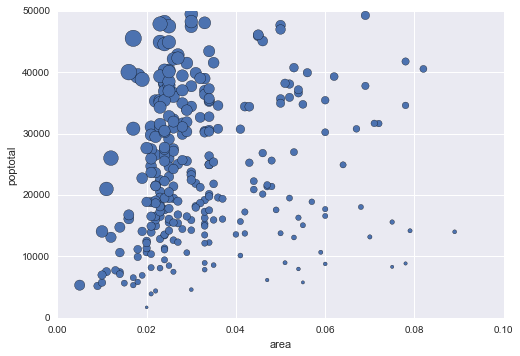

In [5]:
midwest.plot(kind='scatter', x='area', y='poptotal', ylim=((0, 50000)), xlim=((0., 0.1)), s=midwest['popdensity']*0.1)

If we just use the default Pandas scatter, we won't get the colour by state. For that we wil group the dataframe by states and then scatter plot each group individually.

### Complete Pandas' solution (hand-wavy at times!)

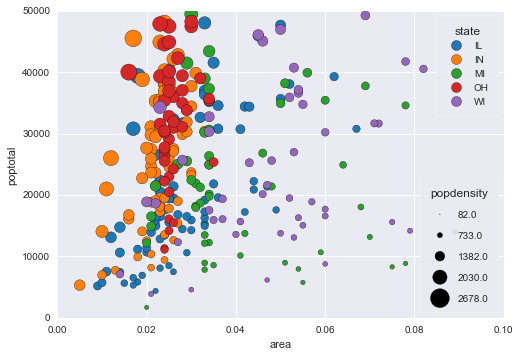

In [6]:
fig, ax = plt.subplots()
groups = midwest.groupby('state')
colors = tableau20[::2]

# Plotting each group 
for i, (name, group) in enumerate(groups):
    group.plot(kind='scatter', x='area', y='poptotal', ylim=((0, 50000)), xlim=((0., 0.1)),
               s=10+group['popdensity']*0.1, # hand-wavy :(
               label=name, ax=ax, color=colors[i])

# Legend for State colours
lgd = ax.legend(numpoints=1, loc=1, borderpad=1, 
            frameon=True, framealpha=0.9, title="state")
for handle in lgd.legendHandles:
    handle.set_sizes([100.0])

# Make a legend for popdensity. Hand-wavy. Error prone!
pws = (pd.cut(midwest['popdensity'], bins=4, retbins=True)[1]).round(0)
for pw in pws:
    plt.scatter([], [], s=(pw**2)/2e4, c="k",label=str(pw))

h, l = plt.gca().get_legend_handles_labels()
plt.legend(h[5:], l[5:], labelspacing=1.2, title="popdensity", borderpad=1, 
            frameon=True, framealpha=0.9, loc=4, numpoints=1)

plt.gca().add_artist(lgd)

### Using Seaborn

The solution using Seaborn is slightly less complicated as we won't need to write the code for plotting different states on different colours. However, the legend jugglery for markersize would still be  required!

(0, 50000)

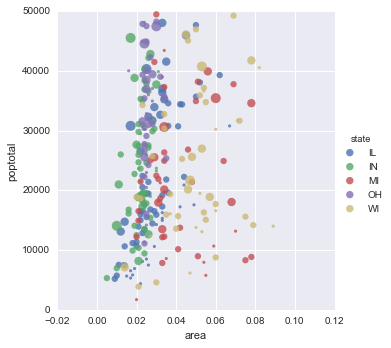

In [7]:
sizes = [10, 40, 70, 100] 
marker_size = pd.cut(midwest['popdensity'], range(0, 2500, 500), labels=sizes) 
sns.lmplot('area', 'poptotal', data=midwest, hue='state', fit_reg=False, scatter_kws={'s':marker_size})
plt.ylim((0, 50000))

### Altair (could not get simpler!)

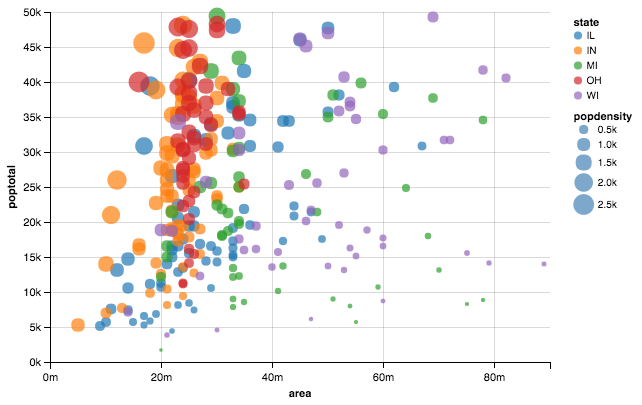

In [8]:
from altair import Chart

chart = Chart(midwest)
chart.mark_circle().encode(
    x='area',
    y='poptotal',
    color='state',
    size='popdensity',
)

### ggplot

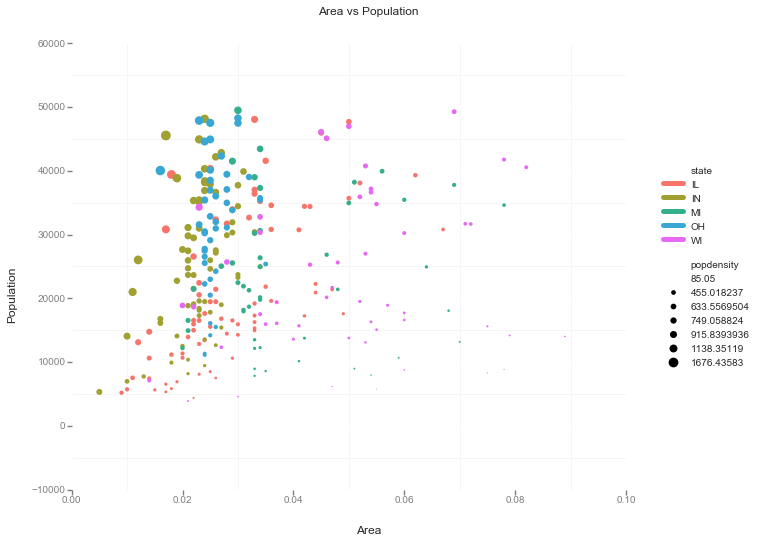

<ggplot: (295628405)>

In [30]:
from ggplot import *

ggplot(aes(x='area', y='poptotal', color='state', size='popdensity'), data=midwest) +\
    geom_point() +\
    theme_bw() +\
    xlab("Area") +\
    ylab("Population") +\
    ggtitle("Area vs Population")

It was great fun (and frustration) trying to make this plot. Still some bits like LOESS are not included in the visualisation I made. 
The best thing about this exercise was discovering Altair! Declarative visualisation looks so natural. Way to go declarative visualisation!